# Ideal Page Rank Algorithm

### Note:
1. Link to self is not considered in this implementation.
2. There can be maximum two link between any two nodes.(one towards each node)

#Python Libraries Required

In [1]:
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt

# Graph Example

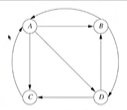

For the graph given above, the Edges & Vertices are as follows:

In [6]:
V = [1,2,3,4] # A = 1, B = 2, C = 3, D = 4 
E = [[1,2],[1,3],[1,4],[2,1],[2,4],[3,1],[4,2],[4,3]]

#Algorithm

In [5]:
def ideal_rank(V,E):
  V = np.array(V)
  E = np.array(E)

  node_count = len(V)
  incoming = {}
  outgoing = {}
  coef = {}
  
  eq = np.zeros([node_count,node_count])
  eq_dict = {}
  ranks = np.zeros(node_count)
  print("Ranks Matrix",ranks)
  print("Equation Matrix",eq)

  print("Initialize Ranks : ",ranks)
  print("Number of Vertices : ",node_count)
  print("Vertices : ",V)


  for x in V:
    in_temp = []
    out_temp = []
    for y in E:
      
      if(x == y[1]):
        in_temp.append(y[0])
      
      if(x == y[0]):
        out_temp.append(y[1])
    
    incoming[x] =  in_temp
    outgoing[x] =  out_temp

  print("incoming",incoming)
  print("Outgoing",outgoing)
  print("..............................................")

  for x in incoming:
    temp =[]
    new =np.zeros(node_count)
    
     
    for y in incoming[x]:
      if(x==1):
        m = 1.0/len(outgoing[y])
      else:  
        m = -1.0/len(outgoing[y])
      temp.append(m)
      new[x-1] = 1
      new[y-1] = m

    if(x==1):
      coef[x] = temp
      new = new + np.ones(node_count)
      new[0]  -= 2  
      eq_dict[x] = new

    else:
      coef[x] = temp
      eq_dict[x] = new

  for x in eq_dict:
    eq[x-1] += eq_dict[x]

  print("Equation Matrix : ")
  print(eq)     
  
  b = np.zeros(node_count)
  b[0] = 1
  
  ranks = np.matmul(la.inv(eq),b.T)
  return ranks

In [7]:
ideal_rank(V,E)

Ranks Matrix [0. 0. 0. 0.]
Equation Matrix [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initialize Ranks :  [0. 0. 0. 0.]
Number of Vertices :  4
Vertices :  [1 2 3 4]
incoming {1: [2, 3], 2: [1, 4], 3: [1, 4], 4: [1, 2]}
Outgoing {1: [2, 3, 4], 2: [1, 4], 3: [1], 4: [2, 3]}
..............................................
Equation Matrix : 
[[ 0.          1.5         2.          1.        ]
 [-0.33333333  1.          0.         -0.5       ]
 [-0.33333333  0.          1.         -0.5       ]
 [-0.33333333 -0.5         0.          1.        ]]


array([0.33333333, 0.22222222, 0.22222222, 0.22222222])

# Another Example

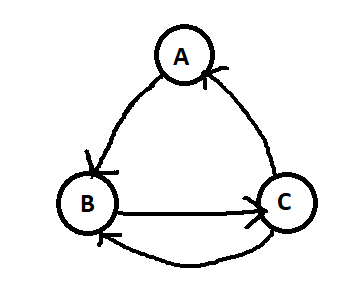

In [8]:
v = [1,2,3]
e = [[1,2],[2,3],[3,1],[3,2]]
ideal_rank(v,e)

Ranks Matrix [0. 0. 0.]
Equation Matrix [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Initialize Ranks :  [0. 0. 0.]
Number of Vertices :  3
Vertices :  [1 2 3]
incoming {1: [3], 2: [1, 3], 3: [2]}
Outgoing {1: [2], 2: [3], 3: [1, 2]}
..............................................
Equation Matrix : 
[[ 0.   1.   1.5]
 [-1.   1.  -0.5]
 [ 0.  -1.   1. ]]


array([0.2, 0.4, 0.4])

#A<----->B

In [9]:
v = [1,2]
e = [[1,2],[2,1]]
ideal_rank(v,e)

Ranks Matrix [0. 0.]
Equation Matrix [[0. 0.]
 [0. 0.]]
Initialize Ranks :  [0. 0.]
Number of Vertices :  2
Vertices :  [1 2]
incoming {1: [2], 2: [1]}
Outgoing {1: [2], 2: [1]}
..............................................
Equation Matrix : 
[[ 0.  2.]
 [-1.  1.]]


array([0.5, 0.5])

##Problem with this approach
Calculating inverse is very tedious if the ghraph is big (for more than 1,000,000 pages) & therefore some other way to find the rank is required.

In [ ]:
%%time
x = np.random.rand(10000,10000)
b = la.inv(x)

CPU times: user 2min 28s, sys: 1.79 s, total: 2min 30s
Wall time: 1min 17s


##Solution - Power Iterations
See Notebook 4